# Team pilot

## Brief: 
### Create a model to predict overall rating of employer

## Problem space:
### 1) Predict overall rating and 2) see if review date month has a significant impact on overall rating

## Objective for today:
### Develop a working MVP

## Success metric:
### 1) Model accuarcy: 70%+
### 2) Improve programming skills for building regression model

# 1) Importing libraries

In [5]:
import pandas as pd
import numpy as np
from sklearn import tree, metrics
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
from IPython.display import Image  

# 2) importing the data

In [8]:
path = r'\\UBSPROD.MSAD.UBS.NET\userdata\FINNC\Home\Documents\Python1\Hack1\hackathon_data-master' # use your path

all_files = glob.glob(path + "/*2018.csv")

li = []

for filename in all_files[:4]:

    df = pd.read_csv(filename, index_col=None, header=0)

In [9]:
df.head()

,rundate,url,company_id,company_name,review_id,review_date,employee_occupation,employee_geography,employee_city,employee_state,...,career_opportunities_rating,recommend,outlook,approves_ceo,ceo,competitors,headquarters,industry,symbol,type
0,20180605,https://www.glassdoor.com/Overview/Working-at-...,13,Oracle,20842026,2018-06-01,Anonymous Employee,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Safra A. Catz & Mark Hurd,NaN,"Redwood City, CA",Enterprise Software & Network Solutions,ORCL,Company
1,20180605,https://www.glassdoor.com/Overview/Working-at-...,16,Cognizant Technology Solutions,20842030,2018-06-01,Programmer Analyst,Chennai (India),Chennai,NaN,...,3.0,Recommends,Positive Outlook,Approves of CEO,Frank D'Souza,"Tata Consultancy Services, Accenture, Capgemini","Teaneck, NJ",Unknown,CTSH,Company
2,20180605,https://www.glassdoor.com/Overview/Working-at-...,224,Jacobs,20842047,2018-06-01,Engineer,"Manchester, England (UK)",Manchester,England,...,4.0,Recommends,Positive Outlook,Approves of CEO,Steven Demetriou,"Fluor, Bechtel, AECOM","Dallas, TX",Construction,JEC,Company
3,20180605,https://www.glassdoor.com/Overview/Working-at-...,2668,Hologic,20842076,2018-06-01,Anonymous Employee,NaN,NaN,NaN,...,2.0,Doesn't Recommend,Neutral Outlook,Approves of CEO,Steve MacMillan,NaN,"Marlborough, MA",Health Care Products Manufacturing,HOLX,Company
4,20180605,https://www.glassdoor.com/Overview/Working-at-...,17,The Home Depot,20842079,2018-06-01,Freight Team Associate,"San Diego, CA",San Diego,CA,...,3.0,Recommends,Neutral Outlook,No opinion of CEO,Craig Menear,NaN,"Atlanta, GA",NaN,HD,Company


## 3) Cleaning the data

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34973 entries, 0 to 34972
Data columns (total 29 columns):
rundate                        34973 non-null int64
url                            34973 non-null object
company_id                     34973 non-null int64
company_name                   34973 non-null object
review_id                      34973 non-null int64
review_date                    34973 non-null object
employee_occupation            34963 non-null object
employee_geography             18563 non-null object
employee_city                  18563 non-null object
employee_state                 13026 non-null object
employee_country               18555 non-null object
employee_status                34973 non-null object
employment_length              21642 non-null object
employment_type                32532 non-null object
overall_rating                 34973 non-null int64
comp_and_benefits_rating       30227 non-null float64
work_life_balance              30297 non-null 

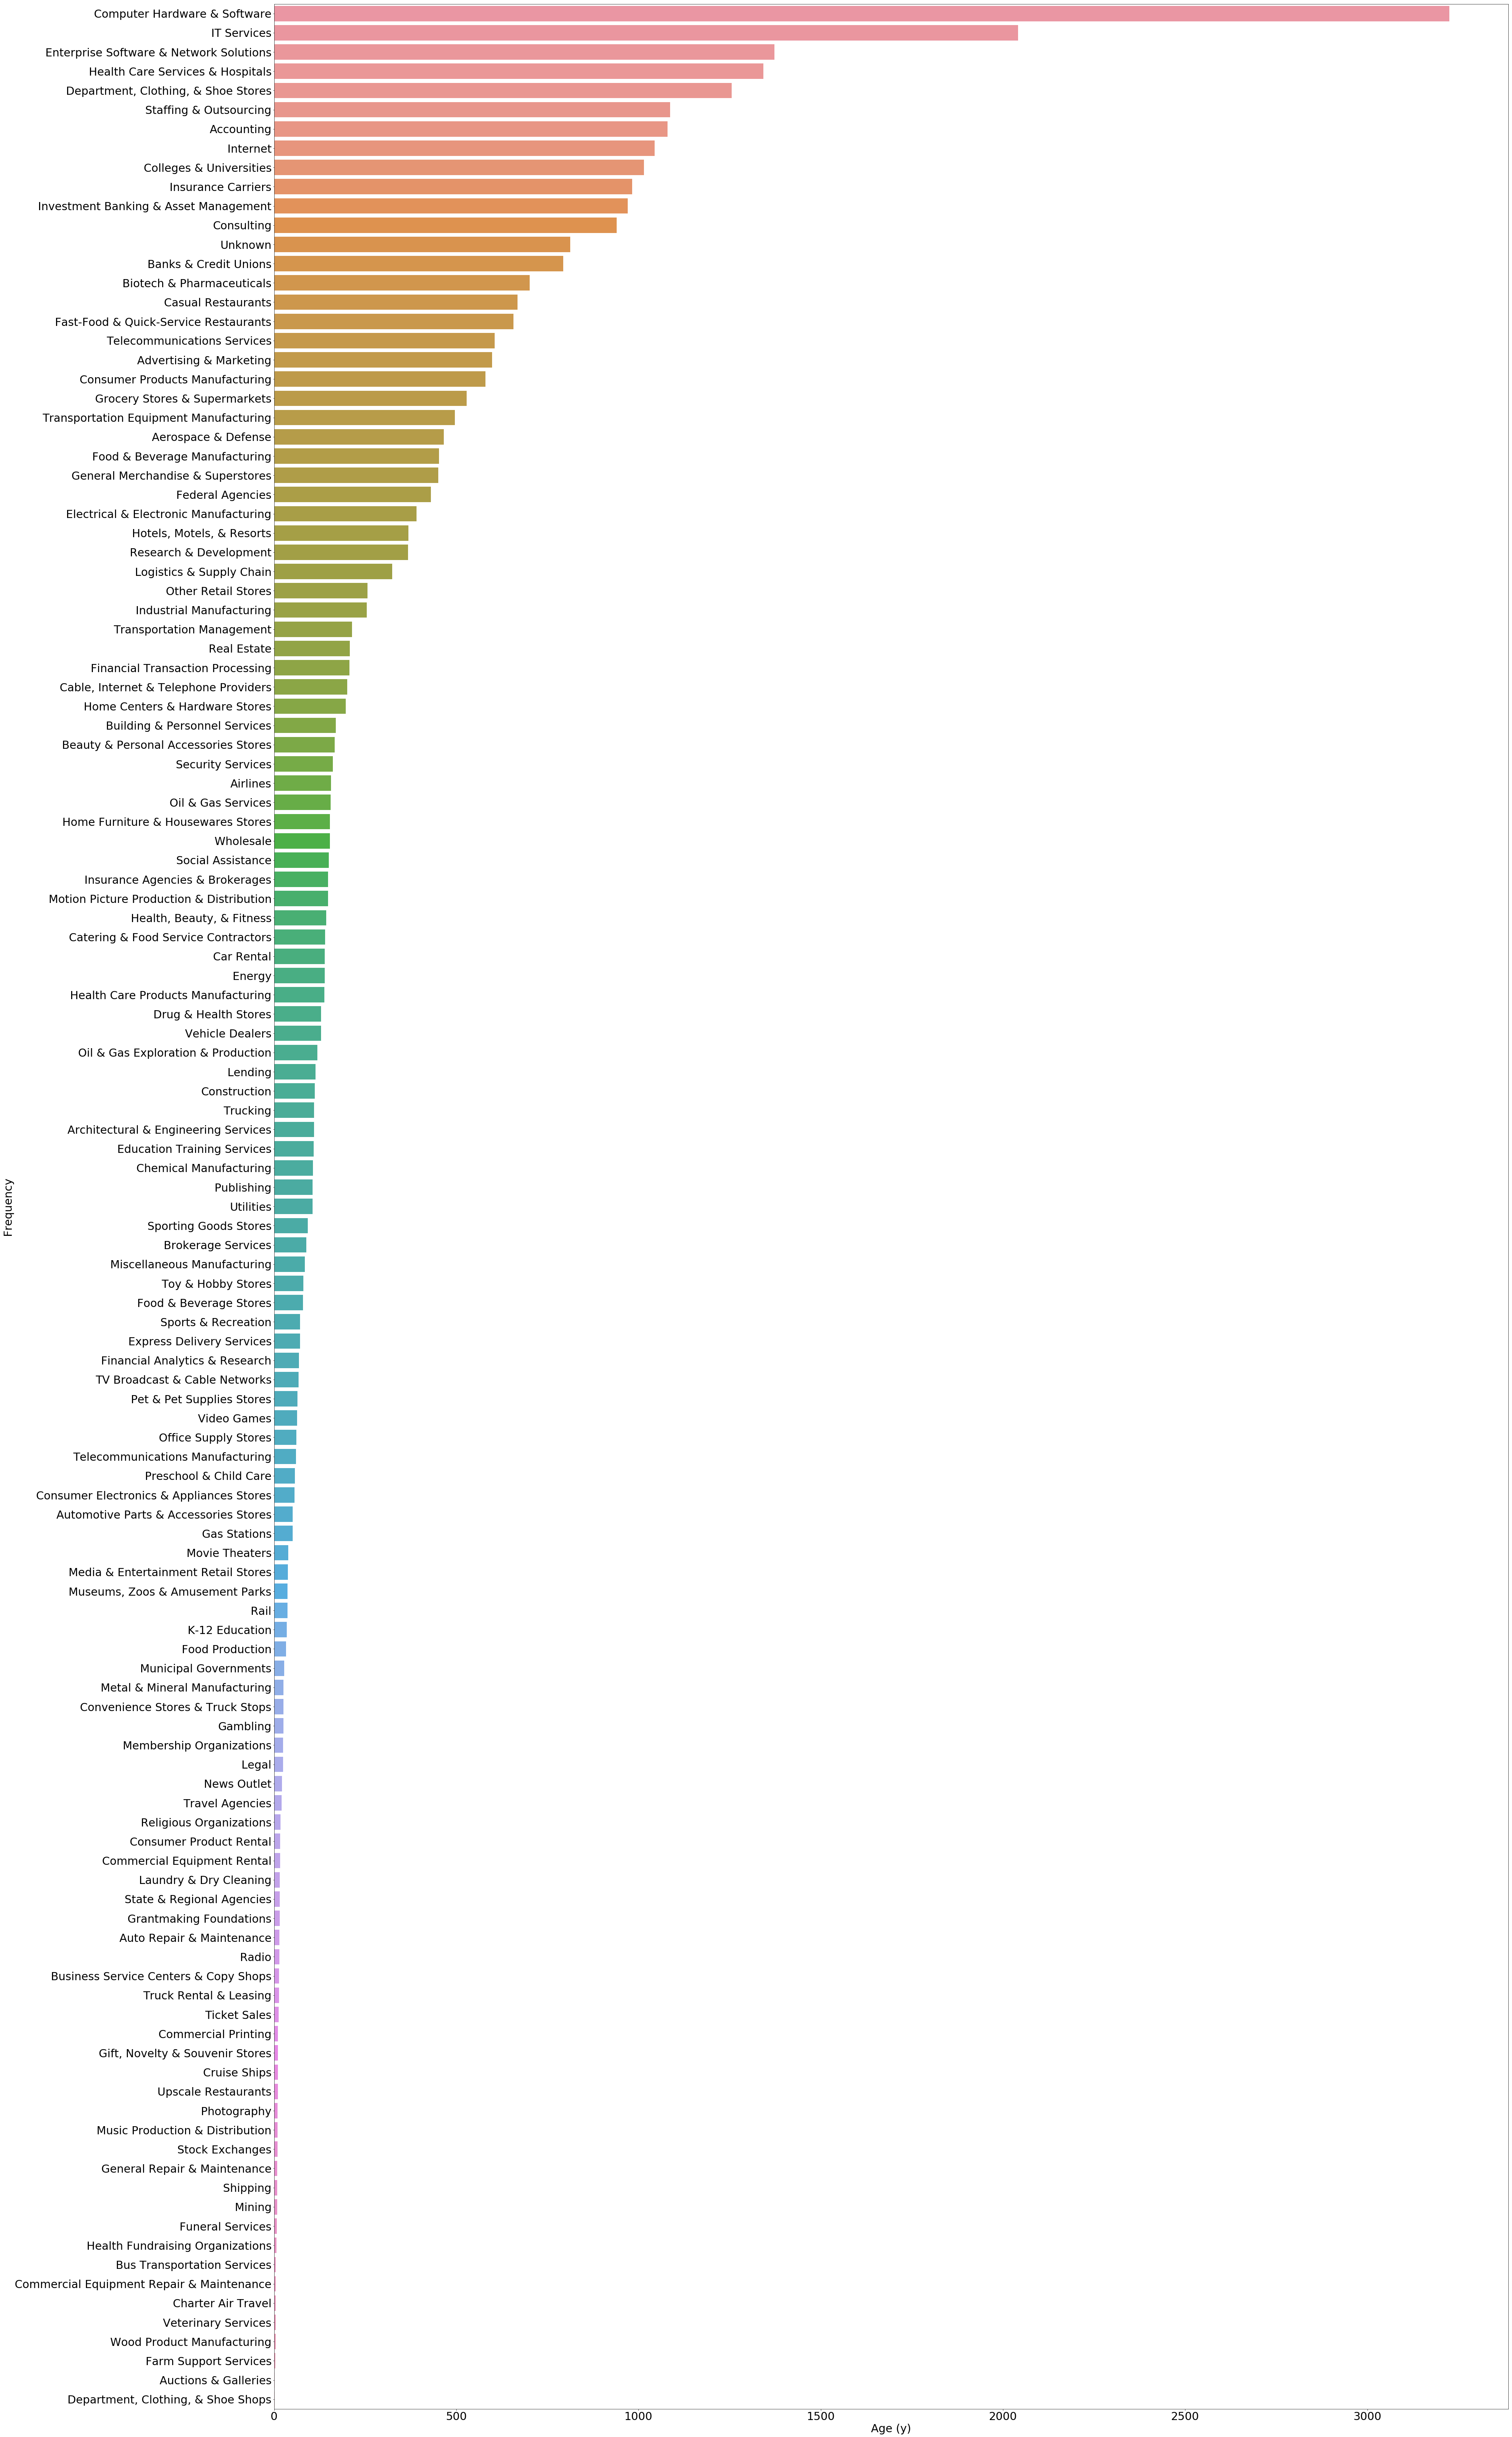

In [26]:
fig1 = sns.countplot(y='industry', orient='h', data=df, order = df['industry'].value_counts().index)
fig1.figure.set_size_inches(60,120)
fig1.set_xlabel("Age (y)", fontsize=30)
fig1.set_ylabel("Frequency", fontsize=30)
fig1.tick_params(labelsize = 30)
plt.show()

In [11]:
df1 = df[['overall_rating', 'comp_and_benefits_rating', 'work_life_balance', 'senior_management_rating', 'culture_values_rating', 'career_opportunities_rating' ]]

In [12]:
df1.describe(include = "all")

,overall_rating,comp_and_benefits_rating,work_life_balance,senior_management_rating,culture_values_rating,career_opportunities_rating
count,34973.000000,30227.000000,30297.000000,29827.000000,30013.000000,30280.000000
mean,3.691791,3.457836,3.524672,3.242063,3.665245,3.496532
std,1.219795,1.260764,1.321450,1.399010,1.360925,1.318492
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000
50%,4.000000,4.000000,4.000000,3.000000,4.000000,4.000000
75%,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [18]:
df2 = df1.dropna()

In [20]:
df1.shape

(34973, 6)

In [19]:
df2.shape

(29468, 6)

## 5. Correlation analysis

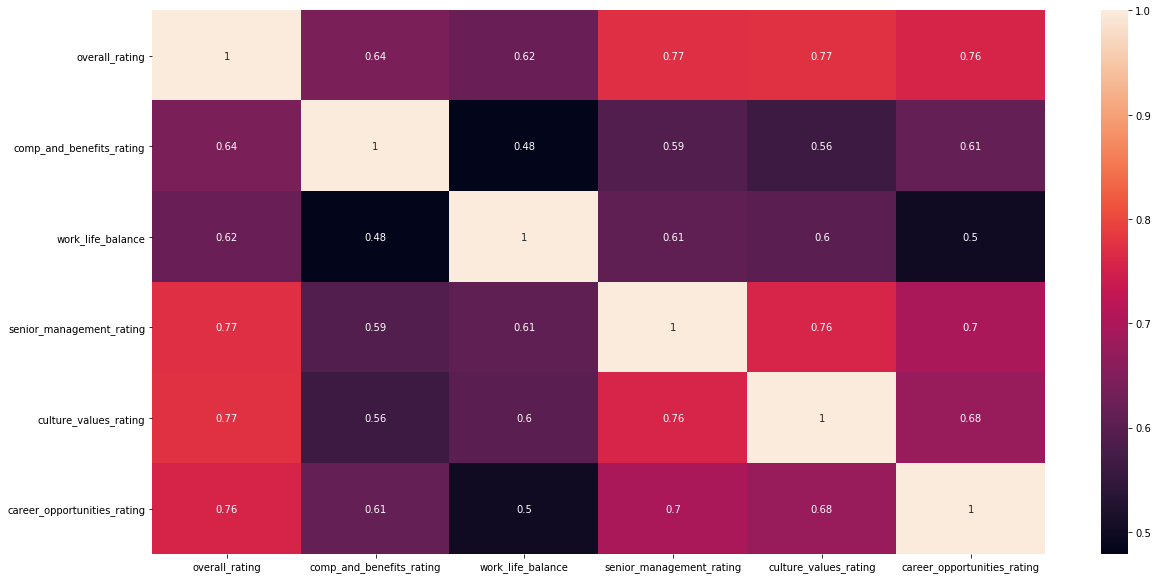

In [27]:
plt.figure(figsize=(20, 10))
sns.heatmap(df2.corr(),  annot=True)

## 6) Classification model

In [29]:
list(df2)

['overall_rating',
 'comp_and_benefits_rating',
 'work_life_balance',
 'senior_management_rating',
 'culture_values_rating',
 'career_opportunities_rating']

In [30]:
feature_cols = ['comp_and_benefits_rating',
 'work_life_balance',
 'senior_management_rating',
 'culture_values_rating',
 'career_opportunities_rating']
X = df2[feature_cols]
y = df2.overall_rating
X_train, X_test, y_train, y_test=train_test_split(X, y, 
                                                  test_size = 0.25,
                                                  random_state = 123)

In [32]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=500,criterion = 'entropy', max_depth=5,random_state=123)
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=None,
            oob_score=False, random_state=123, verbose=0, warm_start=False)

In [33]:
y_pred = clf.predict(X_test)

In [34]:
print("Accuracy:", metrics.accuracy_score(y_test,y_pred))


Accuracy: 0.6523686711008552


Text(91.68, 0.5, 'predicted values')

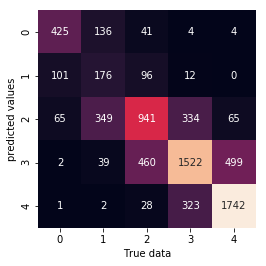

In [36]:
from sklearn.metrics import confusion_matrix
y_true = y_test.tolist()
mat = confusion_matrix(y_true,y_pred)
sns.heatmap(mat.T, square =True, annot = True, fmt = 'd', cbar= False)
plt.xlabel('True data')
plt.ylabel('predicted values')

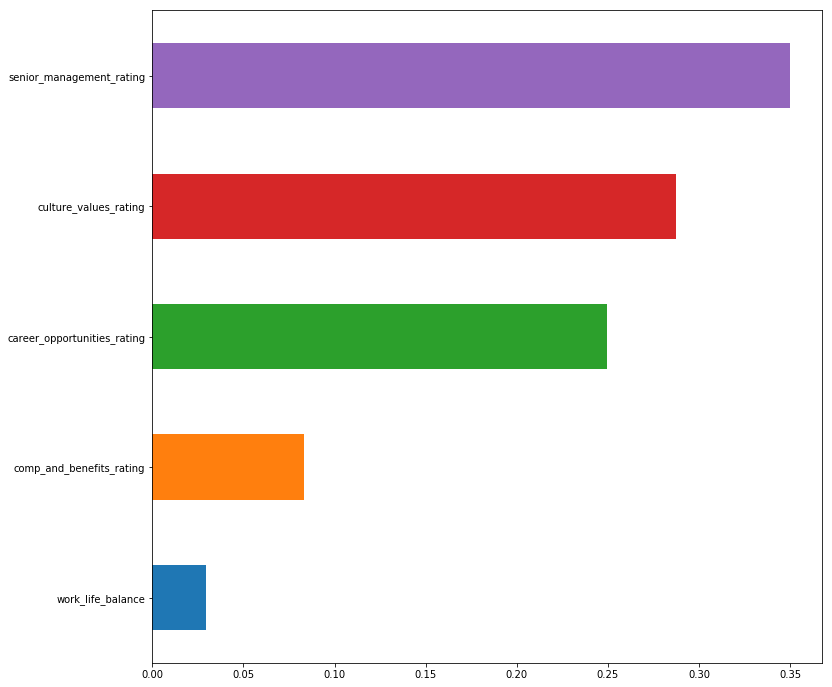

In [35]:
feature_importances = pd.Series(clf.feature_importances_, index = X.columns)
feature_importances = feature_importances.sort_values()
feature_importances.plot(kind='barh', figsize = (12,12))